In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('products_100_rows.csv')

In [3]:
print("data shape",df.shape)
print("columns ",df.columns)
print("data types ",df.dtypes)

data shape (100, 7)
columns  Index(['Product', 'Category', 'Price Before', 'Price After', 'Weight Before',
       'Weight After', 'Date'],
      dtype='object')
data types  Product           object
Category          object
Price Before     float64
Price After      float64
Weight Before    float64
Weight After     float64
Date              object
dtype: object


In [4]:
print("Missing values",df.isnull().sum())
print("\nDuplicates",df.duplicated().sum())

Missing values Product          0
Category         0
Price Before     0
Price After      0
Weight Before    0
Weight After     0
Date             0
dtype: int64

Duplicates 0


In [5]:
print("summary of the string columns\n",df.describe())

summary of the string columns
        Price Before  Price After  Weight Before  Weight After
count    100.000000   100.000000     100.000000    100.000000
mean     270.460800   243.526199       4.405000      4.570820
std      138.376012   124.029937       1.350802      1.414995
min       50.040000    42.891500       2.040000      2.070400
25%      149.642500   132.454050       3.347500      3.495725
50%      272.610000   248.351550       4.340000      4.499550
75%      396.617500   354.867800       5.482500      5.739025
max      499.080000   446.183000       6.980000      7.429000


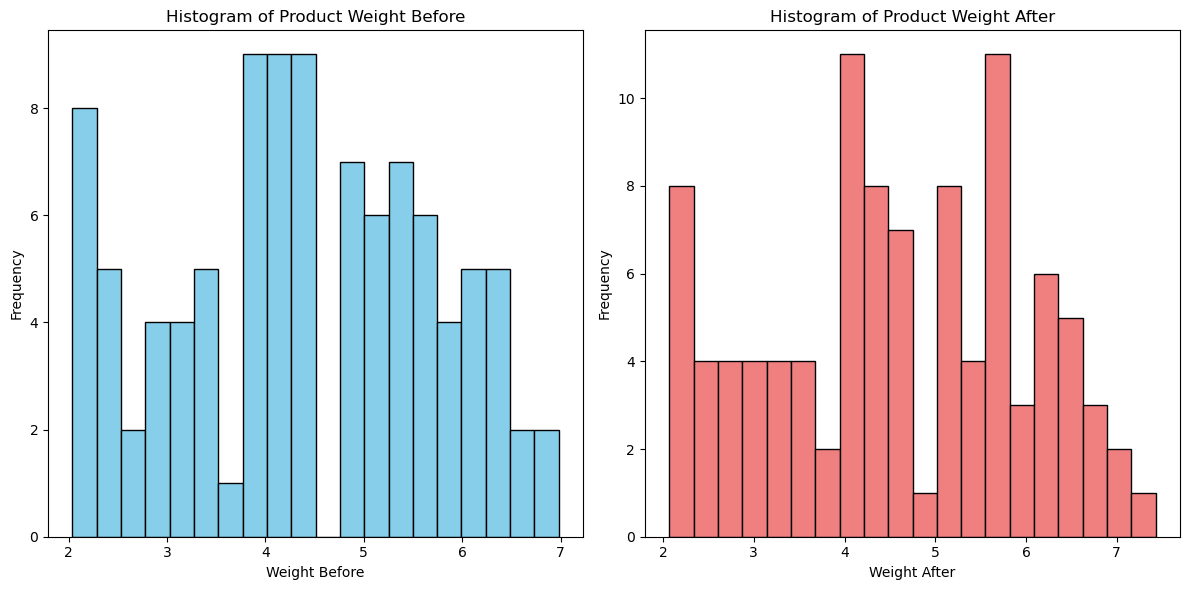

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Weight Before'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Weight Before')
plt.xlabel('Weight Before')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Weight After'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Product Weight After')
plt.xlabel('Weight After')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

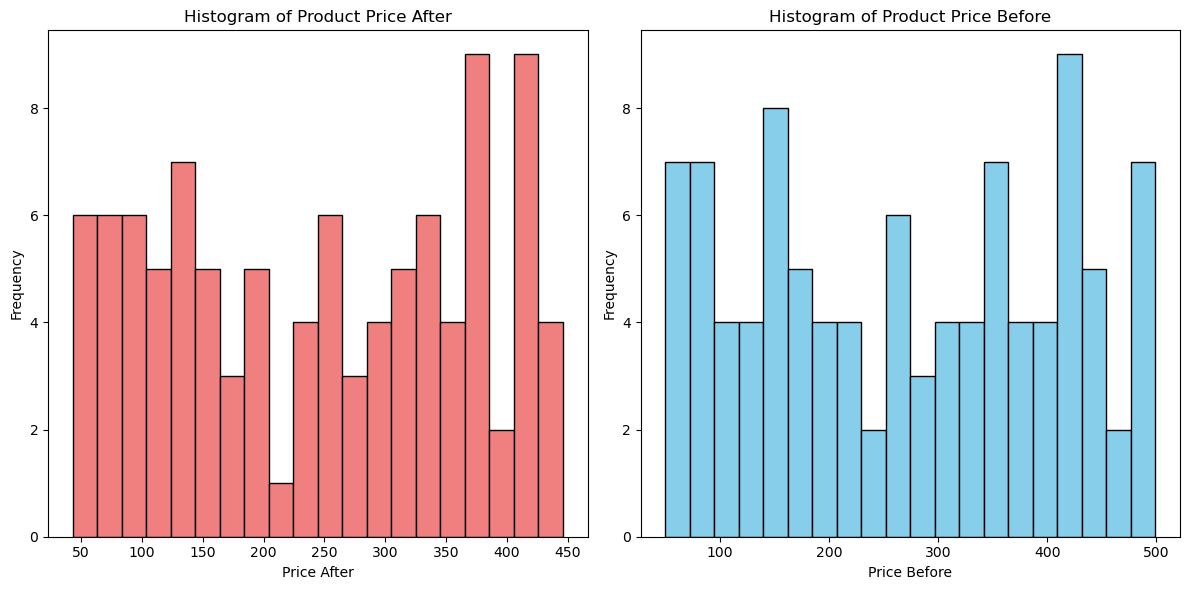

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.hist(df['Price Before'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Price Before')
plt.xlabel('Price Before')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
plt.hist(df['Price After'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Product Price After')
plt.xlabel('Price After')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

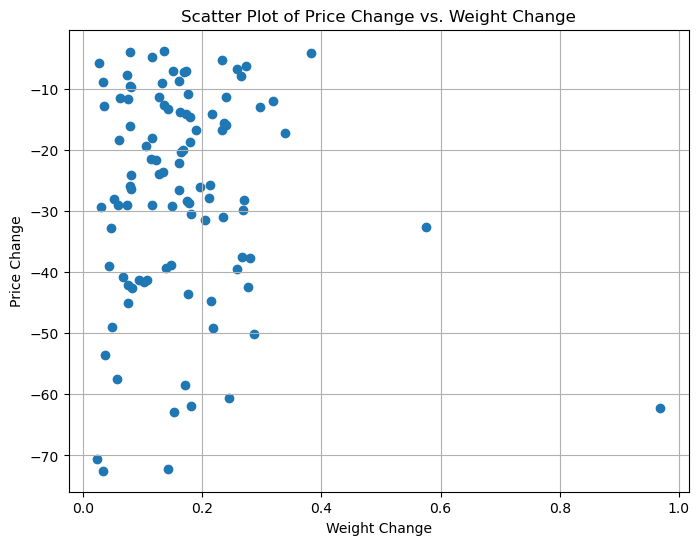

In [8]:
df['Weight Change'] = df['Weight After'] - df['Weight Before']
df['Price Change'] = df['Price After'] - df['Price Before']

plt.figure(figsize=(8, 6))
plt.scatter(df['Weight Change'], df['Price Change'], alpha=1)
plt.title('Scatter Plot of Price Change vs. Weight Change')
plt.xlabel('Weight Change')
plt.ylabel('Price Change')
plt.grid(True)
plt.show()

In [9]:
top_3_size_drop = df.sort_values(by='Weight Change').head(3)
print("Top 3 products with the biggest size drop:")
display(top_3_size_drop[['Product', 'Category', 'Weight Before', 'Weight After', 'Weight Change']])

Top 3 products with the biggest size drop:


,Product,Category,Weight Before,Weight After,Weight Change
32,Fanta,Beverages,2.22,2.2435,0.0235
98,Chips,Snacks,2.22,2.2471,0.0271
38,Cheddar Cheese,Dairy,2.04,2.0704,0.0304


In [10]:
top_3_price_increase = df.sort_values(by='Price Change', ascending=False).head(3)
print("Top 3 products with the biggest price increase:")
display(top_3_price_increase[['Product', 'Category', 'Price Before', 'Price After', 'Price Change']])

Top 3 products with the biggest price increase:


,Product,Category,Price Before,Price After,Price Change
99,Rice Krispies,Cereals,63.82,60.0640,-3.7560
74,Corn Flakes,Cereals,60.88,56.8360,-4.0440
1,Mountain Dew,Beverages,103.17,99.0432,-4.1268


In [11]:
print("mean of weight change ::",df['Weight Change'].mean())
print("median of weight change ::",df['Weight Change'].median())
print("standard deviation of weight change ::",df['Weight Change'].std())

mean of weight change :: 0.16581999999999994
median of weight change :: 0.15225
standard deviation of weight change :: 0.121796666123453


In [12]:
df['Weight Change %'] = ((df['Weight After'] - df['Weight Before']) / df['Weight Before']) * 100
df['Price Change %'] = ((df['Price After'] - df['Price Before']) / df['Price Before']) * 100

correlation = df['Weight Change %'].corr(df['Price Change %'])
print(f"Correlation between Weight Change % and Price Change %: {correlation}")

Correlation between Weight Change % and Price Change %: -0.014969262611405318


In [13]:
shrinkflation_count = df[(df['Weight Change'] < 0) & (df['Price Change'] > 0)].shape[0]
total_products = df.shape[0]
shrinkflation_probability = shrinkflation_count / total_products

print(f"Number of products with shrinkflation: {shrinkflation_count}")
print(f"Total number of products: {total_products}")
print(f"Probability of shrinkflation: {shrinkflation_probability:.2f}")

Number of products with shrinkflation: 0
Total number of products: 100
Probability of shrinkflation: 0.00


In [14]:
df['Shrinkflation_Flag'] = (df['Weight Change'] < 0) & (df['Price Change'] >= 0)
display(df.head())

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,Weight Change,Price Change,Weight Change %,Price Change %,Shrinkflation_Flag
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023,0.0517,-27.9784,1.0,-8.0,False
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022,0.3836,-4.1268,7.0,-4.0,False
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,0.2688,-29.7505,8.0,-13.0,False
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022,0.3388,-17.1636,7.0,-4.0,False
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022,0.9690,-62.2272,15.0,-14.0,False


In [15]:
df['Size_Change_Percentage'] = (((df['Weight After'] - df['Weight Before']) / df['Weight Before']) * 100).round(0)
display(df.head())

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,Weight Change,Price Change,Weight Change %,Price Change %,Shrinkflation_Flag,Size_Change_Percentage
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023,0.0517,-27.9784,1.0,-8.0,False,1.0
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022,0.3836,-4.1268,7.0,-4.0,False,7.0
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,0.2688,-29.7505,8.0,-13.0,False,8.0
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022,0.3388,-17.1636,7.0,-4.0,False,7.0
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022,0.9690,-62.2272,15.0,-14.0,False,15.0


In [16]:
df['Price_Change_Percentage'] = (((df['Price After'] - df['Price Before']) / df['Price Before']) * 100).round(0)
display(df.head())

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,Weight Change,Price Change,Weight Change %,Price Change %,Shrinkflation_Flag,Size_Change_Percentage,Price_Change_Percentage
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023,0.0517,-27.9784,1.0,-8.0,False,1.0,-8.0
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022,0.3836,-4.1268,7.0,-4.0,False,7.0,-4.0
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,0.2688,-29.7505,8.0,-13.0,False,8.0,-13.0
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022,0.3388,-17.1636,7.0,-4.0,False,7.0,-4.0
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022,0.9690,-62.2272,15.0,-14.0,False,15.0,-14.0


In [17]:
sorted_df = df[['Product', 'Size_Change_Percentage', 'Price_Change_Percentage', 'Shrinkflation_Flag']].sort_values(by='Product')
display(sorted_df)

,Product,Size_Change_Percentage,Price_Change_Percentage,Shrinkflation_Flag
9,Butter,1.0,-11.0,False
15,Butter,4.0,-9.0,False
54,Butter,5.0,-12.0,False
58,Butter,5.0,-13.0,False
20,Butter,2.0,-9.0,False
...,...,...,...,...
2,Whole Milk,8.0,-13.0,False
79,Yogurt,5.0,-7.0,False
13,Yogurt,1.0,-12.0,False
66,Yogurt,3.0,-12.0,False


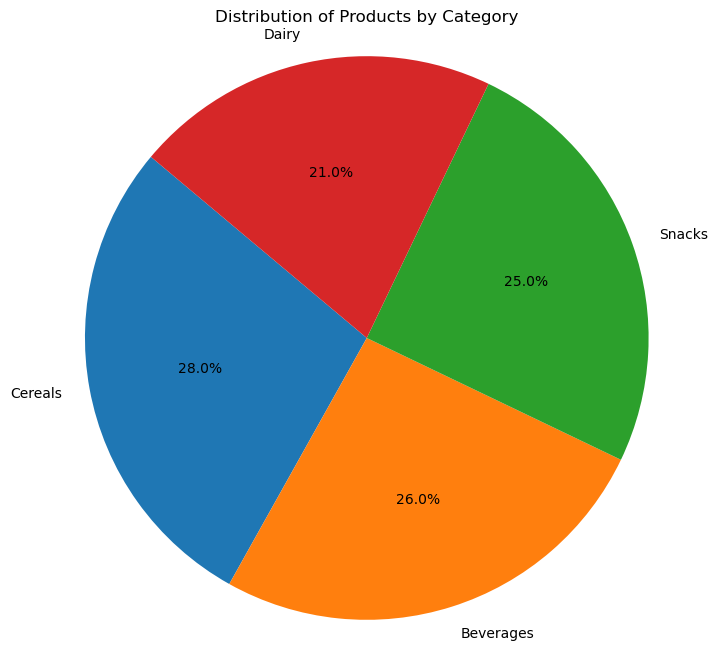

In [18]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Category')
plt.axis('equal')
plt.show()

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Now extract day of week
df['Day of Week'] = df['Date'].dt.day_name()

display(df.head())

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,Weight Change,Price Change,Weight Change %,Price Change %,Shrinkflation_Flag,Size_Change_Percentage,Price_Change_Percentage,Day of Week
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,2023-01-08,0.0517,-27.9784,1.0,-8.0,False,1.0,-8.0,Sunday
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,2022-12-09,0.3836,-4.1268,7.0,-4.0,False,7.0,-4.0,Friday
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,2022-10-25,0.2688,-29.7505,8.0,-13.0,False,8.0,-13.0,Tuesday
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,2022-09-10,0.3388,-17.1636,7.0,-4.0,False,7.0,-4.0,Saturday
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,2022-08-26,0.9690,-62.2272,15.0,-14.0,False,15.0,-14.0,Friday


In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
display(df.head())

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,Weight Change,Price Change,Weight Change %,Price Change %,Shrinkflation_Flag,Size_Change_Percentage,Price_Change_Percentage,Day of Week,Year
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,2023-01-08,0.0517,-27.9784,1.0,-8.0,False,1.0,-8.0,Sunday,2023
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,2022-12-09,0.3836,-4.1268,7.0,-4.0,False,7.0,-4.0,Friday,2022
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,2022-10-25,0.2688,-29.7505,8.0,-13.0,False,8.0,-13.0,Tuesday,2022
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,2022-09-10,0.3388,-17.1636,7.0,-4.0,False,7.0,-4.0,Saturday,2022
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,2022-08-26,0.9690,-62.2272,15.0,-14.0,False,15.0,-14.0,Friday,2022


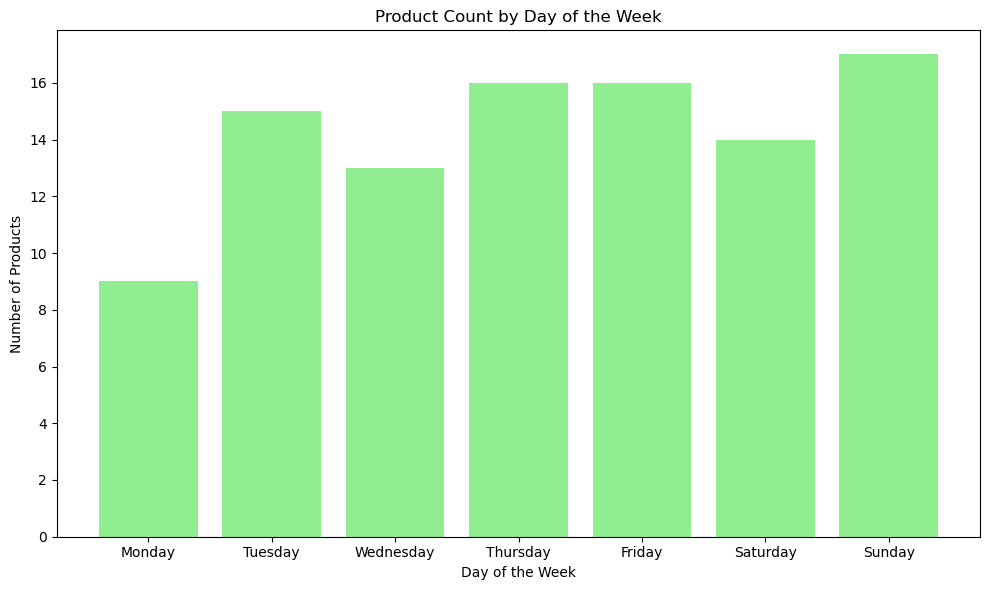

In [22]:
day_of_week_counts = df['Day of Week'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(days_order)
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color='lightgreen')
plt.title('Product Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()